
[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.15238193e+04 1.49808917e+05
 3.21015019e+05]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 107.3490536659528, 387.0515690720249, 566.5818730924565]


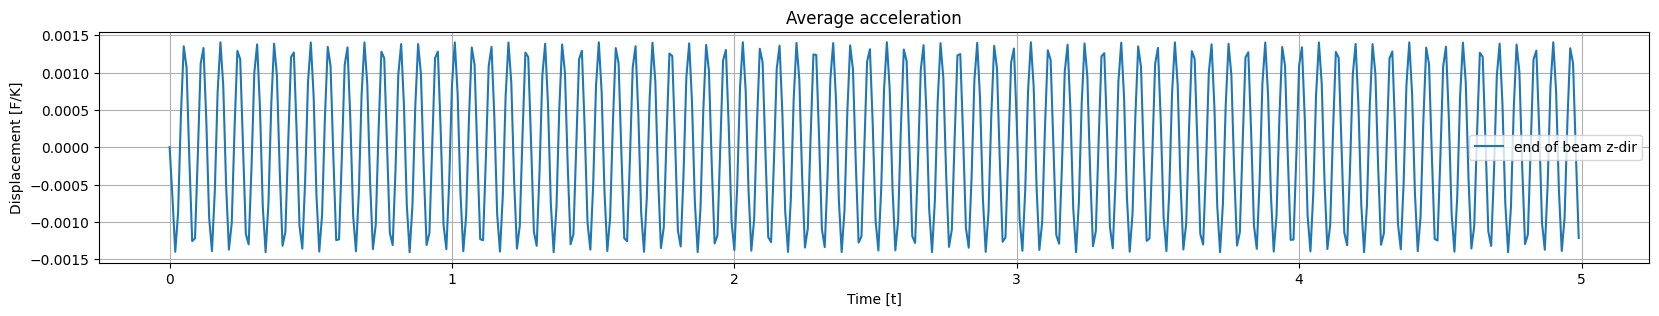

In [3]:

"""K = np.array(
    [
        [1,0,0,0,0,0],
        [0,1,0,0,0,0],
        [0,0,1,0,0,0],
        [0,0,0,1,0,0],
        [0,0,0,0,1,1],
        [0,0,0,0,1,1]
    ]
)
M = np.array(
    [
        [1,0,0,0,0,0],
        [0,1,0,0,0,0],
        [0,0,1,0,0,0],
        [0,0,0,1,0,0],
        [0,0,0,0,1,0],
        [0,0,0,0,0,1]
    ]
)"""
#C = np.zeros((6,6))

"""def getEigenvalues(m, k):
    max_eigenvals = []
    
    eigvals, vecs= eigh(k, m)
    max_eigenvals.append(np.max(eigvals))
    return max_eigenvals

max_eigs = getEigenvalues(M, K)
natFreq = [np.sqrt(i) for i in max_eigs]
print(natFreq)"""
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import numpy as np

gdof = 9 #one element with support in node 1 and load in node 2
d0 = np.zeros((gdof, 1))
v0 = np.zeros((gdof, 1))
f = np.zeros((gdof, 1))
fZeros = np.zeros((gdof, 1))
f[4] = -1000 #applying 1000N in z-direction of node 2

K = np.array(
    [
        [1,0,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0,0],
        [0,0,1,0,0,0,0,0,0],
        [0,0,0,8400000,0,0,0,0,0],
        [0,0,0,0,336000,0,0,0,0],
        [0,0,0,0,0,28000000000,0,0,0],
        [0,0,0,0,0,0,1,0,0],
        [0,0,0,0,0,0,0,1,0],
        [0,0,0,0,0,0,0,0,1]
    ]
)
M = np.array(
    [
        [1,0,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0,0],
        [0,0,1,0,0,0,0,0,0],
        [0,0,0,26.167,0,0,0,0,0],
        [0,0,0,0,29.157,0,0,0,0],
        [0,0,0,0,0,186904.762,0,0,0],
        [0,0,0,0,0,0,1,0,0],
        [0,0,0,0,0,0,0,1,0],
        [0,0,0,0,0,0,0,0,1]
    ]
)

C = np.array(
    [
        [1,0,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0,0],
        [0,0,1,0,0,0,0,0,0],
        [0,0,0,8392,0,0,0,0,0],
        [0,0,0,0,336.056,0,0,0,0],
        [0,0,0,0,0,27972494.767,0,0,0],
        [0,0,0,0,0,0,1,0,0],
        [0,0,0,0,0,0,0,1,0],
        [0,0,0,0,0,0,0,0,1]
    ]
)

C = np.zeros((gdof,gdof))

def Newmark(beta, gamma, dt, vn, dn, an, M, K, C):
    dnplus1_pred = dn + dt*vn + 0.5*(1-2*beta)*dt**2*an
    vnplus1_pred = vn + (1-gamma)*dt*an
    #fnplus1 = np.matmul(M,an) + np.matmul(K,dn) +np.matmul(C,vn)
    #fnplus1_pr = fnplus1 -np.matmul(K,dnplus1_pred) - np.matmul(C,vnplus1_pred)
    fnplus1_pr = -np.matmul(K,dnplus1_pred) - np.matmul(C,vnplus1_pred)
    M_pr = M  + beta*dt**2*K + gamma*dt*C
    anplus1 = np.matmul(np.linalg.inv(M_pr), fnplus1_pr)
    dnplus1 = dnplus1_pred+beta*dt**2*anplus1
    vnplus1 = vnplus1_pred+gamma*dt*anplus1

    return dnplus1, vnplus1, anplus1

def run_Newmark(beta, gamma, dt, time, M, K, C, f0):
#CDM beta=0 M: lumped
    t = np.arange(0,time,dt)
    M_inv = np.linalg.inv(M)
    Cv0 = np.matmul(C,v0)
    Kd0 = np.matmul(K,d0)   
    fCK = f0-Kd0 -Cv0
    a0 = np.matmul(M_inv,fCK)
    dn = d0
    vn = v0
    an = a0
    d = [d0]
    v = [v0]
    a = [a0]
    for i in range(0,len(t)-1):
        dnplus1, vnplus1, anplus1 = Newmark(beta, gamma, dt, vn, dn, an, M, K, C)
        v.append(vnplus1)
        a.append(anplus1)
        d.append(dnplus1)
        dn = dnplus1
        vn = vnplus1
        an = anplus1
    return d,v,a,t
print()
d, v, a, t = run_Newmark(1/4, 1/2, 0.01, 5, M, K, C, f)
dispEnd = []
for disp in d:
    dispEnd.append(disp[4])
#print(dispEnd)
def getEigenvalues(m, k):
    max_eigenvals = []
    
    eigvals, vecs= eigh(k, m)
    max_eigenvals.append(np.max(eigvals))
    return eigvals

eigs = getEigenvalues(M, K)
natFreq = [np.sqrt(i) for i in eigs]
print(eigs)
print(natFreq)

#plot displacements for average acceleration 
title = 'Average acceleration'
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(3)
plt.plot(t, dispEnd, label='end of beam z-dir')
plt.xlabel('Time [t]')
plt.ylabel('Displacement [F/K]')
plt.grid()
plt.legend()
plt.title(title)
plt.show()



In [4]:
E = 210000
I = (1/12)*100**4
EI = E*I
L = 25
m = 100*100*(7.85E-6)

print(12*EI/L**3)
print((m*L/420)*4*L**2)



K = np.array(
    [
        [1,0,0,0,0,0],
        [0,1,0,0,0,0],
        [0,0,1,0,0,0],
        [0,0,0,84000000,0,0],
        [0,0,0,0,1344000000,16800000000],
        [0,0,0,0,16800000000,140000000000]
    ]
)
M = np.array(
    [
        [1,0,0,0,0,0],
        [0,1,0,0,0,0],
        [0,0,1,0,0,0],
        [0,0,0,0.654,0,0],
        [0,0,0,0,0.729,-2.570],
        [0,0,0,0,-2.570,11.682]
    ]
)

C = np.array(
    [
        [1,0,0,0,0,0],
        [0,1,0,0,0,0],
        [0,0,1,0,0,0],
        [0,0,0,83916.094,0,0],
        [0,0,0,0,1342657.342,16783216.783],
        [0,0,0,0,16783216.783,139860139.848]
    ]
)

1344000000.0
11.681547619047617
